In [1]:
from db_connection import DB_Connection
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import TextBox
import re, json
from wordcloud import WordCloud
import Tweet


db = DB_Connection()

database = db.query('''SELECT * FROM TWTTWEET WHERE TWEET_CREATED<'2021-01-01'
                    ORDER BY TWEET_CREATED DESC;''')
df = pd.DataFrame(database, columns=['id','userid','text','date',
                            'link','media1','media2','media3', 'media4'])
df = df.loc[:, ['id', 'text']]


processed = Tweet.clean_text(df, 'text')
classified = Tweet.classify_text(processed, 'clean')

print('Done.')

Connection succesful.
Done.


In [13]:
import pickle
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(max_features=600, min_df=5, max_df=0.7)
X11 = vectorizer1.fit_transform(classified.clean).toarray()

y = [i for i in classified[['isAccident','isObstacle','isDanger']].values]
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X11, y, test_size=0.2, random_state=0)

In [20]:
with open('moresume1', 'rb') as fl:
    moresume1 = pickle.load(fl)

In [21]:
resume1 = pd.DataFrame(moresume0)
resume1.to_csv('resume1.csv')

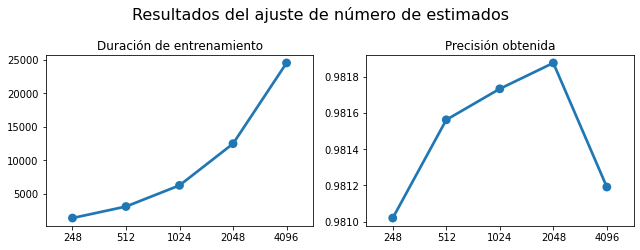

In [4]:
xs = [i[0] for i in moresume0]
ys = [i[1] for i in moresume0]
zs = [i[2] for i in moresume0]

plt.figure(figsize=(9,3.5))
plt.suptitle('Resultados del ajuste de número de estimados', fontsize=16)
plt.subplot(1, 2, 1)
sns.pointplot(x=xs, y=ys)
plt.title('Duración de entrenamiento')
plt.xticks(range(len(xs)), xs)
plt.subplot(1, 2, 2)
sns.pointplot(x=xs, y=zs)
plt.title('Precisión obtenida')
plt.xticks(range(len(xs)), xs)
plt.tight_layout()
plt.show()

In [11]:
with open('moarr0', 'rb') as fl:
    moarr0 = pickle.load(fl)